# European Option Valuation

**Ref** Chap 5 of [DWAP]

In [1]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

### BSM Option valuation

Ever since the publication of the seminal works by Black, Scholes and Merton (BSM) in 1973 (cf. Black and Scholes (1973) and Merton (1973)), the BSM model—which is a continuous market model—and associated option pricing formulas have been considered a benchmark for option pricing. Benchmark in the sense that they provide closed-form solutions in a simple but still somehow realistic setting. The original and famous formula is derived in the papers on the basis of two different arguments. The first one in Black and Scholes (1973) is an equilibrium argument saying that a risk-less portfolio should yield the risk-less interest rate in equilibrium. The second, and rather widely applicable, one from Merton (1973) is that the value of a (European) option should equal the value of a portfolio that, in combination with an appropriate trading strategy, perfectly replicates the payoff at maturity. 

Robert Merton and Myron Scholes received the Nobel Prize for economics in 1997 mainly for this general approach to option pricing and its widespread applicability in mathematical finance.

We consider a complete economy 
$$\mathcal M^{BSM} = \{(\Omega, \mathcal F, \mathbb F, \mathbb P), T, (S, B)\}$$
given by (5.1) and (5.2). BSM call price is given by (5.7), i.e.
$$C(S, K, t, T, r, \sigma) = ...$$
and BSM put price is given by (5.9), i.e.
$$P(S, K, t, T, r, \sigma) = ...$$

In [2]:
#This code loads associated functions to evaluate BSM options
%run 05_com/BSM_option_valuation.py
#%cat 05_com/BSM_option_valuation.py #read code

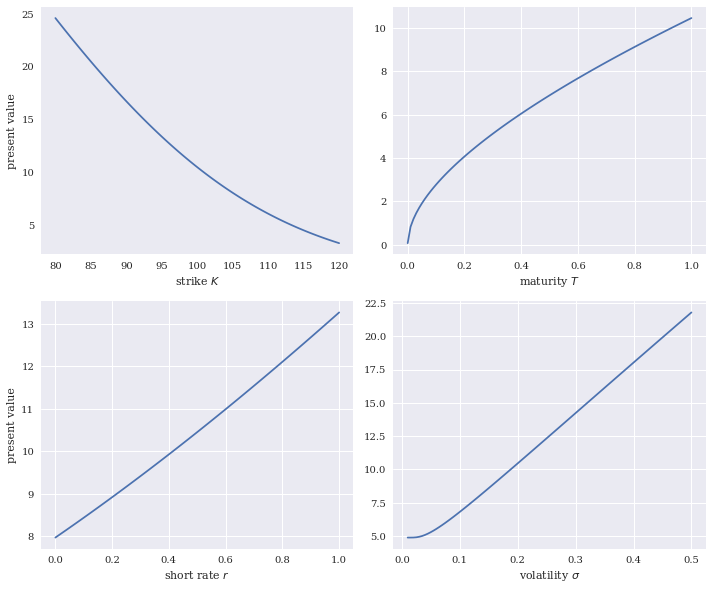

In [3]:
#This draws pictures of call option values while one of parameters is changing
plot_values(BSM_call_value)
#plt.savefig('../images/05_com/BSM_call_values.pdf')
plt.savefig('iBSM_call_values.pdf')

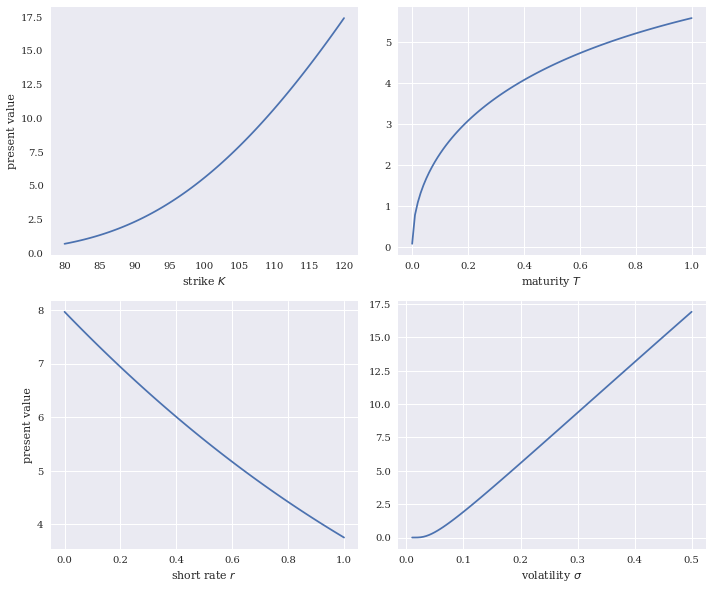

In [4]:
#This draws pictures of put option values while one of parameters is changing
plot_values(BSM_put_value)
plt.savefig('../images/05_com/BSM_put_values.pdf')

### CRR Option Pricing

In 1979, Cox, Ross and Rubinstein presented (cf. Cox et al. (1979)) their binomial option pricing model. This model assumes in principle a BSM economy but in discrete time with discrete state space. Whereas the BSM model necessitates advanced mathematics and the handling of partial differential equations (PDE), the CRR analysis relies on fundamental probabilistic concepts only. Their representation of uncertainty by binomial (recombining) trees is still today the tool of choice when one wishes to illustrate option topics in a simple, intuitive way. Furthermore, their numerical approach allows not only European options but also American options to be valued quite as easily.

We denote CRR model by
$$\mathcal M^{CRR} = \{(\Omega, \mathcal F, \mathbb F, \mathbb P), T, (S, B)\}.$$
The time horizon is
$$t\in \{0, \Delta t, \ldots, T\}:= \mathbb T.$$
Bond price follows binomial tree
$$B_t = e^{-r (T-t)}.$$
Stock price follows
$$S_{t+\Delta t} = S_t \cdot m_t$$
where $m_t \in \{u, d\}$ is a random variable with two possible values with
$$u = e^{\sigma \sqrt{\Delta t}}, d = e^{- \sigma \sqrt{\Delta t}}.$$

**[A1]** $\sigma > r$. 

Under [A1], there exists unique risk-neutral probability $\mathbb Q$ given by
$$q = \mathbb Q(m_t = u) = \frac{e^{r\Delta t} - d}{u - d}, \quad 1- q = \mathbb Q(m_t = d)$$
such that, the discounted stock price $\{e^{-rt} S_t: t \in \mathbb T\}$ is a martingale.

**[Q]** 
If [A1] is violated, then does it still make the model arbitrage free?

CRR call value can be evaluated backwardly from
$$C_0 = e^{-rT} \mathbb E_0^{\mathbb Q} [C_T].$$

In [5]:
%run 05_com/CRR_option_valuation.py
#%cat 05_com/CRR_option_valuation.py #read code

<Figure size 432x288 with 0 Axes>

In [6]:
BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
BSM_benchmark

10.45058357218553

In [7]:
%time CRR_option_value(S0, K, T, r, sigma, 'call', M=2000)

CPU times: user 675 ms, sys: 86.7 ms, total: 762 ms
Wall time: 338 ms


10.449583775457942

CPU times: user 9.3 s, sys: 819 ms, total: 10.1 s
Wall time: 1.87 s


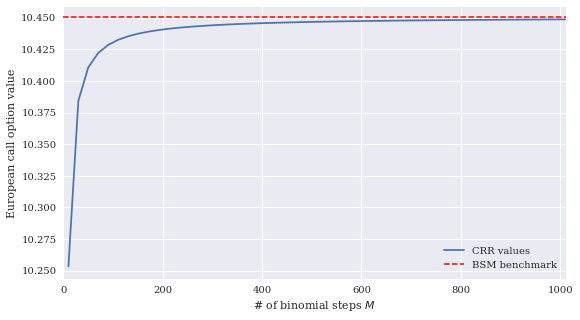

In [8]:
%%time
mmin = 10
mmax = 1011
stepsize = 20
plot_convergence(mmin, mmax, stepsize) # This computes CRR evaluation with M = mmin + stepsize*k not exceeding mmax for all integer k 
plt.savefig('../images/05_com/CRR_convergence_1.pdf')

CPU times: user 6.73 s, sys: 501 ms, total: 7.23 s
Wall time: 1.32 s


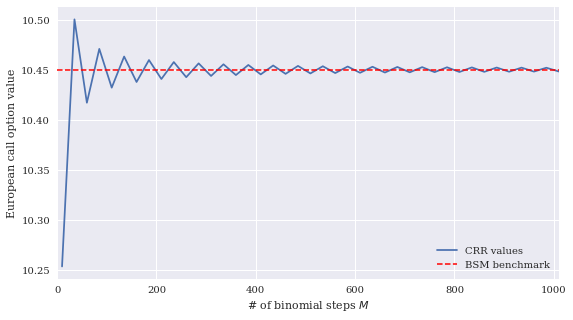

In [9]:
%%time
plot_convergence(10, 1011, 25)
plt.savefig('../images/05_com/CRR_convergence_2.pdf')

**[Q??]**
- Why does CRR converge to BSM as the number of steps $M$ is getting bigger?
- In the above, when step size is 25, the convergence is zig-zag, while 20, it is smoothly monotone. Why?